In [2]:
import pandas as pd
import numpy as np
import gc
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_feather('optimized_nfl.feather')
df.head()

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,playId,nflId,pff_role,...,team,playDirection,x,y,s,a,dis,o,dir,event
0,2021090900,2021,1,2021-09-09,2022-12-20 20:20:00,TB,DAL,97,25511,Pass,...,TB,right,37.770000,24.219999,0.29,0.30,0.03,165.160004,84.989998,None
1,2021090900,2021,1,2021-09-09,2022-12-20 20:20:00,TB,DAL,97,25511,Pass,...,TB,right,37.779999,24.219999,0.23,0.11,0.02,164.330002,92.870003,None
2,2021090900,2021,1,2021-09-09,2022-12-20 20:20:00,TB,DAL,97,25511,Pass,...,TB,right,37.779999,24.240000,0.16,0.10,0.01,160.240005,68.550003,None
3,2021090900,2021,1,2021-09-09,2022-12-20 20:20:00,TB,DAL,97,25511,Pass,...,TB,right,37.730000,24.250000,0.15,0.24,0.06,152.130005,296.850006,None
4,2021090900,2021,1,2021-09-09,2022-12-20 20:20:00,TB,DAL,97,25511,Pass,...,TB,right,37.689999,24.260000,0.25,0.18,0.04,148.330002,287.549988,None


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7111893 entries, 0 to 7111892
Data columns (total 70 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   gameId                  int32         
 1   season                  int32         
 2   week                    int32         
 3   gameDate                datetime64[ns]
 4   gameTimeEastern         datetime64[ns]
 5   homeTeamAbbr            object        
 6   visitorTeamAbbr         object        
 7   playId                  int32         
 8   nflId                   int32         
 9   pff_role                object        
 10  pff_positionLinedUp     object        
 11  pff_hit                 float32       
 12  pff_hurry               float32       
 13  pff_sack                float32       
 14  pff_beatenByDefender    float32       
 15  pff_hitAllowed          float32       
 16  pff_hurryAllowed        float32       
 17  pff_sackAllowed         float32       
 18  pf

In [5]:
box = ['preSnapHomeScore', 'preSnapVisitorScore', 'yardsToGo', 'dis']
kde = ['x','y','weight','o','dir']
cat = ['defendersInBox','down','dropBackType','gameTimeEastern','offenseFormation','passResult','pff_passCoverage','pff_passCoverageType','pff_role','playDirection']

In [6]:
catx = ['defendersInBox','down','gameTimeEastern','offenseFormation','passResult','pff_passCoverageType','pff_role','playDirection']

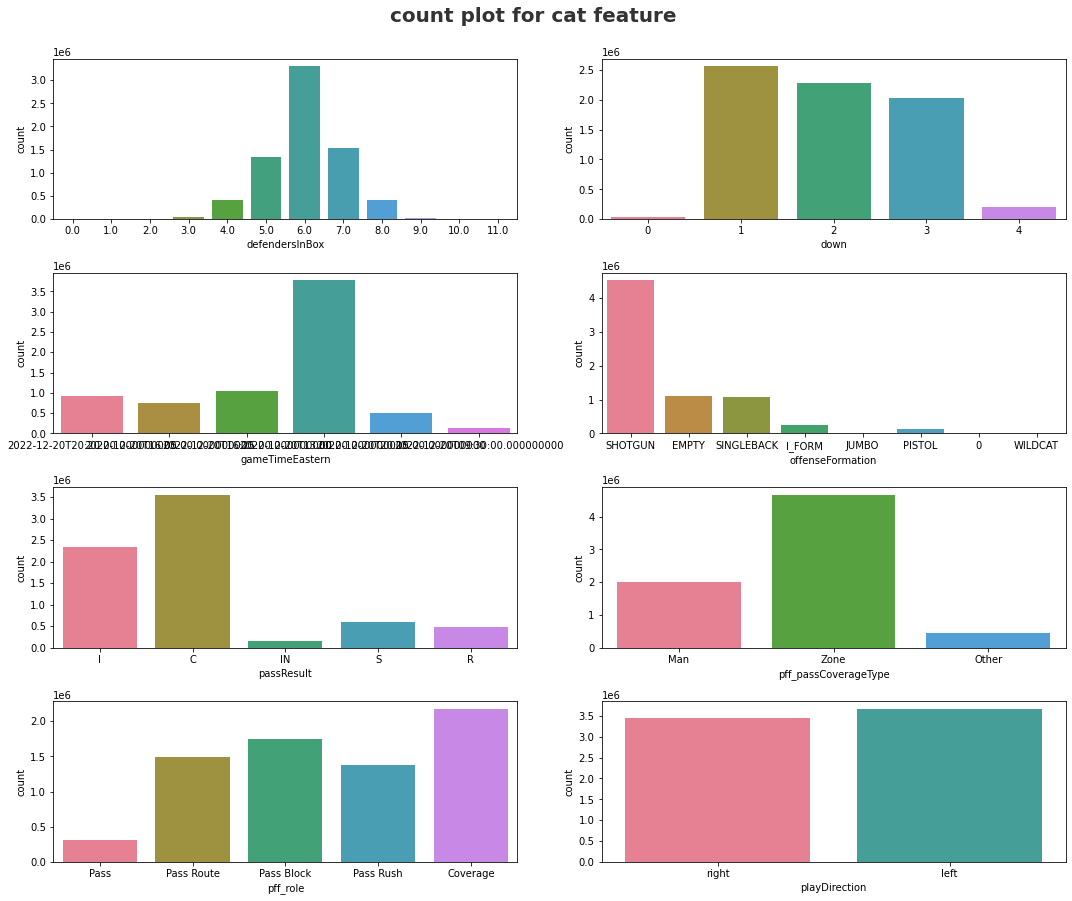

In [7]:
plt.figure(figsize=(15,15))
plt.suptitle("count plot for cat feature ", fontsize = 20,fontweight="bold" , alpha = 0.8 , y=1.)
for item in range(0,len(catx)):
    plt.subplot(5 , 2 , item+1)
    sns.countplot(x=df[catx[item]],palette='husl')
    plt.xlabel(catx[item])
    plt.tight_layout()
    gc.collect()

In [8]:
df['team'].unique()

array(['TB', 'DAL', 'ATL', 'LA', 'NE', 'MIA', 'PHI', 'CHI', 'NO', 'CAR',
       'NYG', 'MIN', 'LAC', 'GB', 'WAS', 'NYJ', 'SF', 'KC', 'LV', 'DET',
       'ARI', 'HOU', 'PIT', 'BUF', 'CIN', 'DEN', 'SEA', 'CLE', 'TEN',
       'JAX', 'BAL', 'IND'], dtype=object)

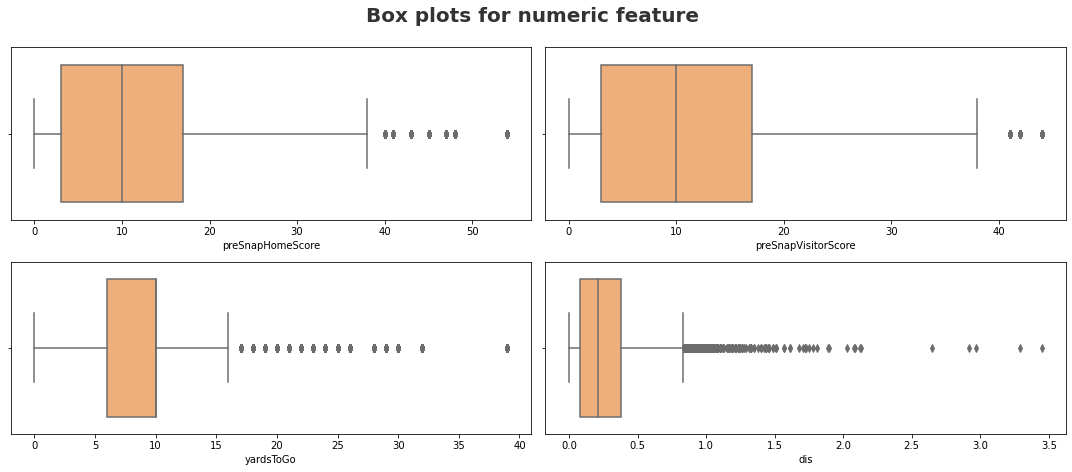

In [9]:
plt.figure(figsize=(15,15))
plt.suptitle("Box plots for numeric feature ", fontsize = 20,fontweight="bold" , alpha = 0.8 , y=1.)
for item in range(0,len(box)):
    plt.subplot(5 , 2 , item+1)
    sns.boxplot(x=df[box[item]], color = '#fdae6b', saturation = 0.8)
    plt.xlabel(box[item])
    plt.tight_layout()
    gc.collect()

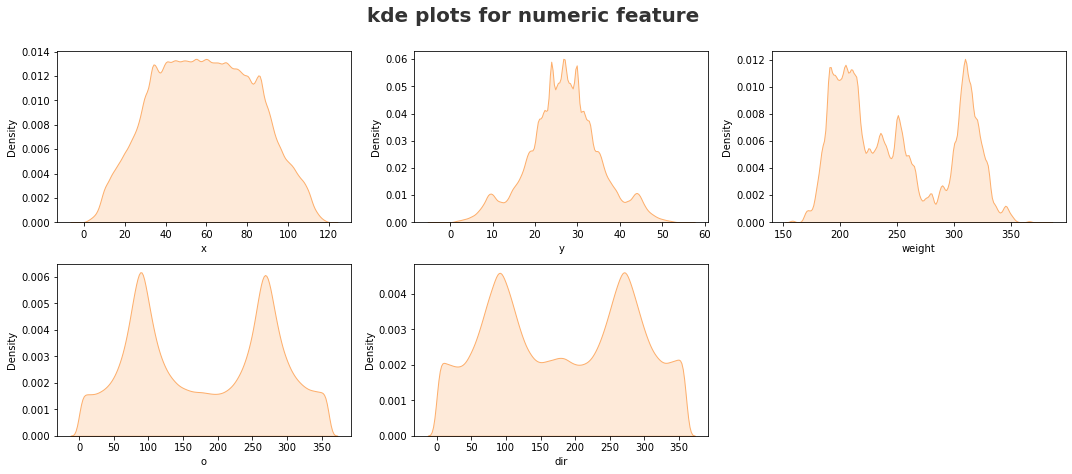

In [10]:
plt.figure(figsize=(15,15))
plt.suptitle("kde plots for numeric feature ", fontsize = 20,fontweight="bold" , alpha = 0.8 , y=1.)
for item in range(0,len(kde)):
    plt.subplot(5 , 3 , item+1)
    sns.kdeplot(x=df[kde[item]], color = '#fdae6b', shade = True)
    plt.xlabel(kde[item])
    plt.tight_layout()
    gc.collect()

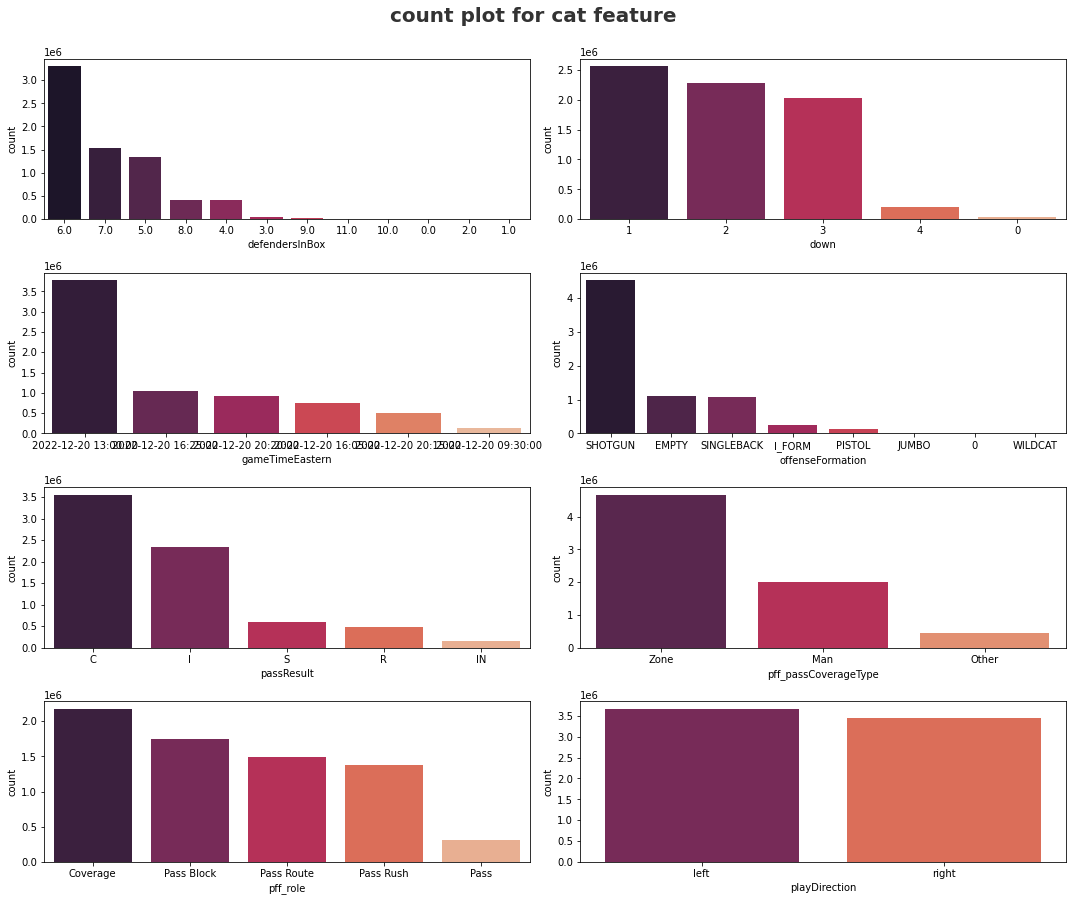

In [11]:
plt.figure(figsize=(15,15))
plt.suptitle("count plot for cat feature ", fontsize = 20,fontweight="bold" , alpha = 0.8 , y=1.)
for item in range(0,len(catx)):
    plt.subplot(5 , 2 , item+1)
    sns.countplot(x=df[catx[item]],order = [col[0] for col in df[catx[item]].value_counts().items()],palette="rocket")
    plt.xlabel(catx[item])
    plt.tight_layout()
    gc.collect()